In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('processed_data.csv', parse_dates=['Date'], index_col='Date')

In [6]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [16]:
data

,Open,High,Low,Last,Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2016-01-04,400.00,400.10,375.05,376.15,377.05,7822660,3.129064e+09,298.444207,288.023096,-0.054698,0.938169
2016-01-05,381.05,382.45,372.10,373.00,374.45,6901068,2.629652e+09,298.444207,288.023096,-0.006896,0.931699
2016-01-06,374.25,375.50,364.60,365.00,365.90,7211230,2.698803e+09,298.444207,288.023096,-0.022833,0.910425
2016-01-07,356.25,358.00,338.10,344.80,343.55,11782307,4.197447e+09,298.444207,288.023096,-0.054698,0.854815
2016-01-08,345.60,355.85,345.60,353.90,353.35,8770370,3.031040e+09,298.444207,288.023096,0.028526,0.879199
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,465.70,472.45,460.10,472.45,471.15,12557565,5.848058e+09,488.014000,358.624250,0.007592,1.172307
2021-12-28,475.20,482.80,472.65,480.35,480.20,22860916,1.086351e+10,487.666000,359.399500,0.019208,1.194825
2021-12-29,478.75,481.60,474.25,474.75,476.00,10263884,4.913834e+09,486.994000,360.173250,-0.008746,1.184374


In [19]:
date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')  
data = data.reindex(date_range, method='ffill')  
print(data.head())

              Open    High     Low    Last   Close    Volume  Total Traded  \
2016-01-04  400.00  400.10  375.05  376.15  377.05   7822660  3.129064e+09   
2016-01-05  381.05  382.45  372.10  373.00  374.45   6901068  2.629652e+09   
2016-01-06  374.25  375.50  364.60  365.00  365.90   7211230  2.698803e+09   
2016-01-07  356.25  358.00  338.10  344.80  343.55  11782307  4.197447e+09   
2016-01-08  345.60  355.85  345.60  353.90  353.35   8770370  3.031040e+09   

                  MA50       MA200   returns  Cumulative Return  
2016-01-04  298.444207  288.023096 -0.054698           0.938169  
2016-01-05  298.444207  288.023096 -0.006896           0.931699  
2016-01-06  298.444207  288.023096 -0.022833           0.910425  
2016-01-07  298.444207  288.023096 -0.054698           0.854815  
2016-01-08  298.444207  288.023096  0.028526           0.879199  


In [21]:
# Checking the frequency of the Date index
print(data.index.inferred_freq)

B


In [27]:
data.index.name = 'Date'
print(data.index.name)

Date


In [28]:
data

,Open,High,Low,Last,Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2016-01-04,400.00,400.10,375.05,376.15,377.05,7822660,3.129064e+09,298.444207,288.023096,-0.054698,0.938169
2016-01-05,381.05,382.45,372.10,373.00,374.45,6901068,2.629652e+09,298.444207,288.023096,-0.006896,0.931699
2016-01-06,374.25,375.50,364.60,365.00,365.90,7211230,2.698803e+09,298.444207,288.023096,-0.022833,0.910425
2016-01-07,356.25,358.00,338.10,344.80,343.55,11782307,4.197447e+09,298.444207,288.023096,-0.054698,0.854815
2016-01-08,345.60,355.85,345.60,353.90,353.35,8770370,3.031040e+09,298.444207,288.023096,0.028526,0.879199
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,465.70,472.45,460.10,472.45,471.15,12557565,5.848058e+09,488.014000,358.624250,0.007592,1.172307
2021-12-28,475.20,482.80,472.65,480.35,480.20,22860916,1.086351e+10,487.666000,359.399500,0.019208,1.194825
2021-12-29,478.75,481.60,474.25,474.75,476.00,10263884,4.913834e+09,486.994000,360.173250,-0.008746,1.184374


In [30]:
print(data.index.dtype)

datetime64[ns]


In [31]:
print(data.index.name)

Date


In [32]:
print(data.index.is_unique)  
print(data.index.isnull().sum())  

True
0


In [34]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['returns'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -36.913547354959604
p-value: 0.0


In [35]:
if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")

Data is stationary


In [36]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

train_target = train['returns']
test_target = test['returns']

In [37]:
arima_model = ARIMA(train_target, order=(5, 1, 0))  
arima_fitted_model = arima_model.fit()

In [38]:
arima_forecast = arima_fitted_model.forecast(steps=len(test))

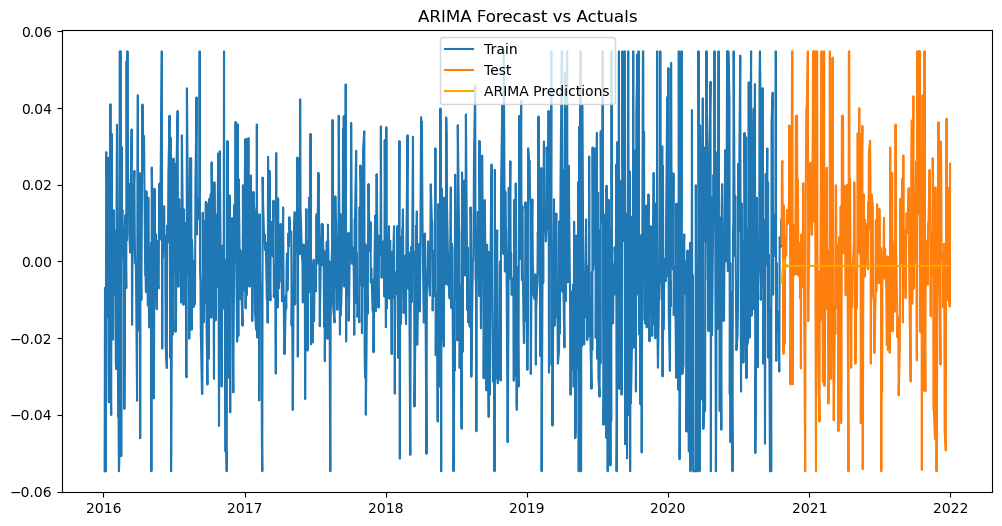

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(train_target, label='Train')
plt.plot(test_target, label='Test')
plt.plot(test_target.index, arima_forecast, label='ARIMA Predictions', color='orange')
plt.legend()
plt.title("ARIMA Forecast vs Actuals")
plt.show()

In [41]:
arima_rmse = np.sqrt(mean_squared_error(test_target, arima_forecast))
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 0.024979084561109366


In [48]:
arima_future = arima_fitted_model.forecast(steps=100)
arima_future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=100, freq='B')

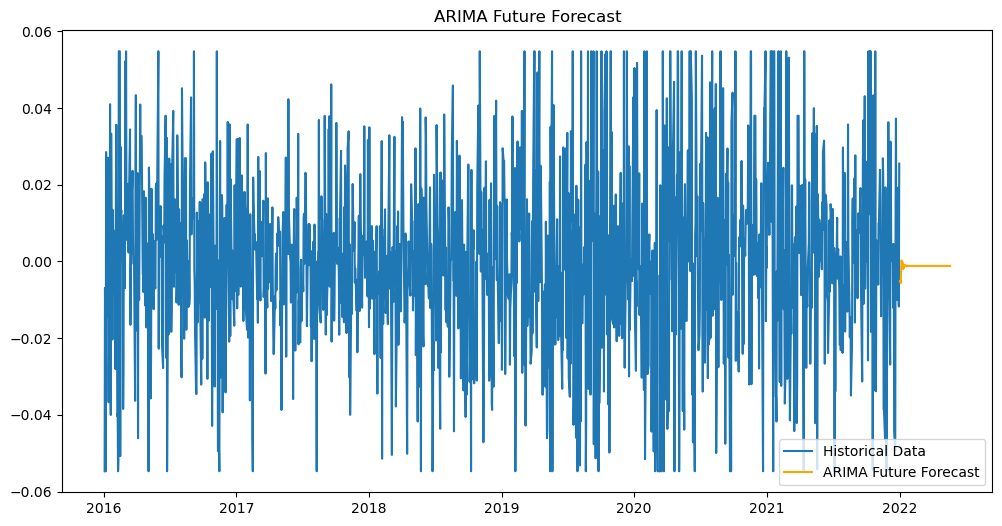

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['returns'], label='Historical Data')
plt.plot(arima_future_dates, arima_future, label='ARIMA Future Forecast', color='orange')
plt.legend()
plt.title("ARIMA Future Forecast")
plt.show()

In [50]:
import pickle
with open('arima_model.pkl', 'wb') as model_file:
    pickle.dump(arima_fitted_model, model_file)

In [51]:
data

,Open,High,Low,Last,Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2016-01-04,400.00,400.10,375.05,376.15,377.05,7822660,3.129064e+09,298.444207,288.023096,-0.054698,0.938169
2016-01-05,381.05,382.45,372.10,373.00,374.45,6901068,2.629652e+09,298.444207,288.023096,-0.006896,0.931699
2016-01-06,374.25,375.50,364.60,365.00,365.90,7211230,2.698803e+09,298.444207,288.023096,-0.022833,0.910425
2016-01-07,356.25,358.00,338.10,344.80,343.55,11782307,4.197447e+09,298.444207,288.023096,-0.054698,0.854815
2016-01-08,345.60,355.85,345.60,353.90,353.35,8770370,3.031040e+09,298.444207,288.023096,0.028526,0.879199
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,465.70,472.45,460.10,472.45,471.15,12557565,5.848058e+09,488.014000,358.624250,0.007592,1.172307
2021-12-28,475.20,482.80,472.65,480.35,480.20,22860916,1.086351e+10,487.666000,359.399500,0.019208,1.194825
2021-12-29,478.75,481.60,474.25,474.75,476.00,10263884,4.913834e+09,486.994000,360.173250,-0.008746,1.184374


In [53]:
import pandas as pd
forecasted_returns = [-0.005073, -0.005652, -0.002968, 0.000281, 0.000082, 
                      -0.000325, -0.001963, -0.001710, -0.001170, -0.000905]

initial_price = 377.05  
predicted_prices = [initial_price]
for return_value in forecasted_returns:
    next_price = predicted_prices[-1] * (1 + return_value)
    predicted_prices.append(next_price)
predicted_prices_df = pd.DataFrame(predicted_prices, columns=["Predicted Price"])

print(predicted_prices_df)

    Predicted Price
0        377.050000
1        375.137225
2        373.016950
3        371.909835
4        372.014342
5        372.044847
6        371.923933
7        371.193846
8        370.559105
9        370.125550
10       369.790587
